In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [0]:
import io
raw_data = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

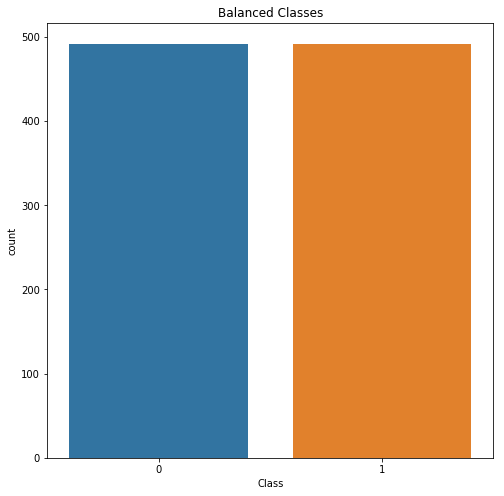

In [18]:
shuffled_data = raw_data.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_data = shuffled_data.loc[shuffled_data['Class'] == 1]

#Randomly select 866 observations from the non-fraud (majority class)
non_fraud_data = shuffled_data.loc[shuffled_data['Class'] == 0].sample(n=492,random_state=42)

# Concatenate both dataframes again
data = pd.concat([fraud_data, non_fraud_data])

plt.figure(figsize=(8, 8))
sns.countplot('Class', data=data)
plt.title('Balanced Classes')
plt.show()

In [0]:
X = data.iloc[:, 1:29].values
y = data.iloc[:, -1].values

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

In [0]:
def model_report(y_act, y_pred):
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, cohen_kappa_score, roc_curve,auc
    print("Confusion Matrix = ", confusion_matrix(y_act, y_pred))
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall = " ,recall_score(y_act, y_pred))
    print("F1 Score = " ,f1_score(y_act, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Error rate = " ,1 - accuracy_score(y_act, y_pred))
    print("AUC-ROC Curve: ")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(false_positive_rate, true_positive_rate,marker='.')
    plt.show()
    pass

In [0]:
#Importing Time for clalculating the training and testing time
import time
start_time = time.time()

#importing Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predicting the Test set results
y_pred = gnb.predict(X_test)

#Getting the predicting probability
predict_probab = gnb.predict_proba(X_test)

#Geting the log_loss value of the model
from sklearn.metrics import log_loss
logloss = log_loss(y_test, predict_probab)
end_time = time.time()
eta = end_time - start_time

10 Fold Cross Validation Score Of Gaussian Naive Bayes: 0.904648247322298
Time Elapsed: 0.012054920196533203
Log Loss: 1.979773414852328
Confusion Matrix =  [[105   3]
 [ 16  73]]
Accuracy =  0.9035532994923858
Precision =  0.9605263157894737
Recall =  0.8202247191011236
F1 Score =  0.8848484848484848
AUC Score = 0.896223470661673
Kappa score =  0.8027612372872425
Error rate =  0.09644670050761417
AUC-ROC Curve: 


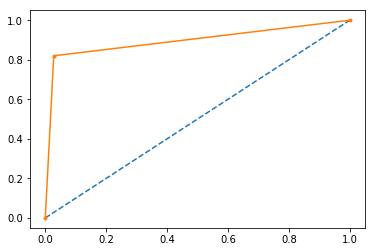

In [23]:
#10-fold cross validation score
from sklearn.model_selection import cross_val_score
accuracy_gausian = cross_val_score(estimator = gnb, X = X_train, y = y_train, cv =10)
gnb_mean = accuracy_gausian.mean()
print("10 Fold Cross Validation Score Of Gaussian Naive Bayes:", gnb_mean)
print('Time Elapsed:', eta)
print('Log Loss:', logloss)
#printing the output using the model report function
model_report(y_test, y_pred)

In [0]:
#Importing Time for clalculating the training and testing time
import time
start_time = time.time()
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.03
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 20
params['min_data'] = 5
params['max_depth'] = 20
lgbm = lgb.train(params, d_train, 500)
#Prediction
y_pred=lgbm.predict(X_test)
end_time = time.time()
eta = end_time - start_time

In [0]:
for i in range(0,197):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

Time Elapsed: 0.9782907962799072
Confusion Matrix =  [[103   5]
 [  5  84]]
Accuracy =  0.949238578680203
Precision =  0.9438202247191011
Recall =  0.9438202247191011
F1 Score =  0.9438202247191011
AUC Score = 0.9487619642114025
Kappa score =  0.8975239284228048
Error rate =  0.050761421319796995
AUC-ROC Curve: 


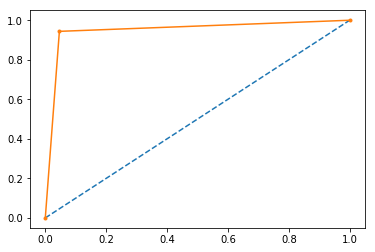

In [26]:
print('Time Elapsed:', eta)
model_report(y_test, y_pred)

10-Fold Cross  Validation Score of XGBOOST(Without Paramter Tuning): 0.9301772963323597
Time Elapsed: 0.8460378646850586
Confusion Matrix =  [[103   5]
 [  4  85]]
Accuracy =  0.9543147208121827
Precision =  0.9444444444444444
Recall =  0.9550561797752809
F1 Score =  0.9497206703910613
AUC Score = 0.9543799417394923
Kappa score =  0.90786259938679
Error rate =  0.045685279187817285
AUC-ROC Curve: 


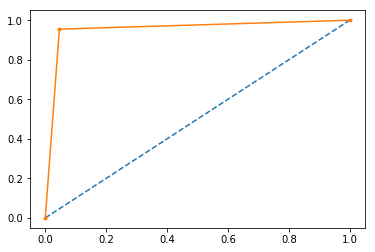

In [27]:
import time
start_time = time.time()
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'gpu_hist')
xgb.fit(X_train, y_train)   
# Predicting the Test set results
y_pred = xgb.predict(X_test)
end_time = time.time()
eta = end_time - start_time
#10-fold cross validation score
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)
xgb_cross = accuracy.mean()
print("10-Fold Cross  Validation Score of XGBOOST(Without Paramter Tuning):", xgb_cross)
print('Time Elapsed:', eta)
#printing the output using the model report function
model_report(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


10-Fold Cross  Validation Score of Random Forest 0.9237739114710479
Time Elapsed: 0.23397111892700195
Confusion Matrix =  [[100   8]
 [  5  84]]
Accuracy =  0.934010152284264
Precision =  0.9130434782608695
Recall =  0.9438202247191011
F1 Score =  0.9281767955801105
AUC Score = 0.9348730753225135
Kappa score =  0.8671749390591774
Error rate =  0.06598984771573602
AUC-ROC Curve: 


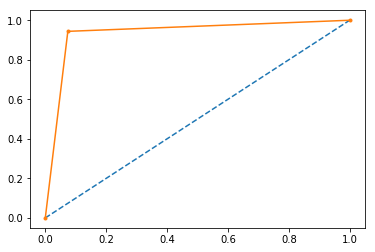

In [28]:
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = rf.predict(X_test)
end_time = time.time()
eta = end_time - start_time
#10-fold cross validation score
accuracy = cross_val_score(estimator = rf, X = X_train, y = y_train, cv =2)
rf_cross = accuracy.mean()
print("10-Fold Cross  Validation Score of Random Forest", rf_cross)
print('Time Elapsed:', eta)
#printing the output using the model report function
model_report(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


10-Fold Cross  Validation Score of SVC 0.9225081050361013
Time Elapsed: 0.16390156745910645
Confusion Matrix =  [[101   7]
 [  5  84]]
Accuracy =  0.9390862944162437
Precision =  0.9230769230769231
Recall =  0.9438202247191011
F1 Score =  0.9333333333333335
AUC Score = 0.9395027049521432
Kappa score =  0.8772713113903021
Error rate =  0.060913705583756306
AUC-ROC Curve: 


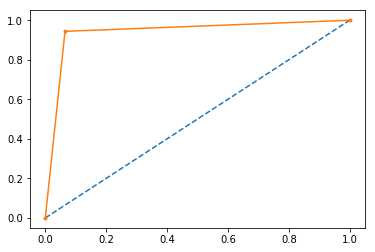

In [61]:
start_time = time.time()
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)
y_pred = rf.predict(X_test)
end_time = time.time()
eta = end_time - start_time
#10-fold cross validation score
accuracy = cross_val_score(estimator = svc, X = X_train, y = y_train, cv =2)
svc_cross = accuracy.mean()
print("10-Fold Cross  Validation Score of SVC", svc_cross)
print('Time Elapsed:', eta)
#printing the output using the model report function
model_report(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10-Fold Cross  Validation Score of Random Forest 0.9275874762661294
Time Elapsed: 0.022810697555541992
Confusion Matrix =  [[100   8]
 [  5  84]]
Accuracy =  0.934010152284264
Precision =  0.9130434782608695
Recall =  0.9438202247191011
F1 Score =  0.9281767955801105
AUC Score = 0.9348730753225135
Kappa score =  0.8671749390591774
Error rate =  0.06598984771573602
AUC-ROC Curve: 


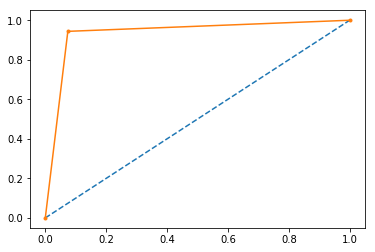

In [30]:
start_time = time.time()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
end_time = time.time()
eta = end_time - start_time
#10-fold cross validation score
accuracy = cross_val_score(estimator = lr, X = X_train, y = y_train, cv =2)
lr_cross = accuracy.mean()
print("10-Fold Cross  Validation Score of Random Forest", lr_cross)
print('Time Elapsed:', eta)
#printing the output using the model report function
model_report(y_test, y_pred)

In [0]:
seed = 345
est = range(1,100,5)
eta = np.arange(0.01,0.2,0.05)
max_dept = range(3,10,1)
sub_sample = np.arange(0.5,1,0.1)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators' : est,
        'learning_rate' : np.linspace(1e-16,1,3),
        'eta' : eta,
        
        }
param_comb = 100

In [15]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs= -1, verbose=3, random_state=50, cv = 10 )
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  8.0min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=...
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'eta': array([0.01, 0.06, 0.11, 0.16]),
                                        'gamma': [0.5, 1, 1.5, 2,

In [16]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([0.67011468, 0.5733357 , 1.47442739, 0.64184594, 1.34375379,
       1.4166414 , 0.45613427, 0.84402361, 1.20816658, 1.52135882,
       0.77465425, 1.11722581, 0.7233634 , 0.57007999, 1.27439313,
       0.31100492, 0.32090774, 0.85601244, 1.36015558, 0.3700068 ,
       1.00591714, 1.11050305, 0.3795275 , 0.70346761, 1.51252825,
       0.57093682, 0.76635683, 1.25576248, 1.14622431, 1.08910184,
       1.41465175, 0.93119156, 0.71493015, 0.07682812, 0.680598  ,
       1.23938794, 1.5288631 , 0.30606222, 0.98392282, 1.26097255,
       0.56657975, 1.17036574, 1.41534281, 1.37544677, 0.96675708,
       0.58152752, 1.46886716, 0.43168602, 1.52188911, 1.45362251,
       0.59185519, 0.30976768, 0.31439519, 1.70106151, 1.54456358,
       0.79506586, 1.26860001, 0.46161041, 0.04884551, 1.12172201,
       0.05018919, 1.75694551, 0.77424295, 1.3333246 , 0.31211302,
       0.67783315, 0.74908049, 0.78150051, 0.56105483, 0.85041184,
       1.48719144, 0.30201564

In [0]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()

In [0]:
lgbmParams = {
    'learning_rate': np.arange(0.01,0.05,0.01),
    'num_leaves': range(10,200,5),
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : np.arange(1,10,1),
    'random_state' : [501], 
    'colsample_bytree' : np.arange(0.1,1,0.1),
    'subsample' : np.arange(0.1,1,0.1),
    'min_split_gain' : np.arange(0.1,1,0.1),
    'min_data_in_leaf':range(1,20,1),
    'metric':['accuracy']
    }
param_comb = 100

In [0]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(lgbm, param_distributions=lgbmParams, n_iter=param_comb, scoring='accuracy', n_jobs= -1, verbose=3, random_state=10 )

In [0]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   14.8s finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0....
                                        'metric': ['accuracy'],
                                        'min_data_in_leaf': range(1, 20),
                                 

In [0]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([0.06378206, 0.09101407, 0.06042004, 0.14528267, 0.02894767,
       0.05077322, 0.04098439, 0.09016411, 0.06750592, 0.15480224,
       0.02555339, 0.14320262, 0.07904919, 0.03582215, 0.17373753,
       0.07009538, 0.04555591, 0.19277048, 0.12218761, 0.12896037,
       0.12141379, 0.11537671, 0.04362456, 0.1209871 , 0.1067218 ,
       0.17728043, 0.12521331, 0.09615374, 0.0906709 , 0.04055882,
       0.1576825 , 0.12072126, 0.10123301, 0.07390277, 0.1040291 ,
       0.12339489, 0.09040761, 0.10270111, 0.0651679 , 0.12675556,
       0.10950589, 0.12782494, 0.11783695, 0.0768075 , 0.0624613 ,
       0.0413115 , 0.03733778, 0.08288089, 0.09412535, 0.1193587 ,
       0.13329212, 0.05648271, 0.10913992, 0.06381798, 0.11684346,
       0.04495962, 0.10609023, 0.03116711, 0.09299135, 0.07507523,
       0.06223011, 0.10613004, 0.07978368, 0.14718056, 0.13417967,
       0.14476077, 0.09695395, 0.06766637, 0.04871464, 0.133986  ,
       0.15495022, 0.10454488

10-Fold Cross  Validation Score(With Paramter Tuning): 0.9352572216812722
Confusion Matrix =  [[100   8]
 [  7  82]]
Accuracy =  0.9238578680203046
Precision =  0.9111111111111111
Recall =  0.9213483146067416
F1 Score =  0.9162011173184358
AUC Score = 0.9236371202663338
Kappa score =  0.84643766564465
Error rate =  0.07614213197969544
AUC-ROC Curve: 


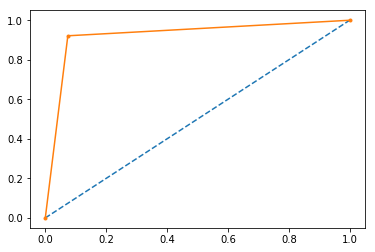

In [17]:
from xgboost import XGBClassifier
xgb = XGBClassifier(subsample = 0.6, n_estimators = 46, min_child_weight = 10, max_depth = 4, learning_rate = 0.5, gamma = 1, eta = 0.01, colsample_bytree = 0.8)
xgb.fit(X_train, y_train)
# Predicting the Test set results
y_pred = xgb.predict(X_test)
#10-fold cross validation score
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv =10)
xgb_cross = accuracy.mean()
print("10-Fold Cross  Validation Score(With Paramter Tuning):", xgb_cross)

model_report(y_test, y_pred)

In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.03
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'accuracy'
params['sub_feature'] = 0.5
params['num_leaves'] = 65
params['min_data'] = 5
params['max_depth'] = 8
params['subsample'] = 0.5
params['random_state'] = 501
params['min_data_in_leaf'] = 3
params['colsample_bytree'] = 0.9
params['min_split_gain'] = 0.7000000000000001
lgbm = lgb.train(params, d_train, 500)
#Prediction
y_pred=lgbm.predict(X_test)

In [0]:
for i in range(0,197):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

Confusion Matrix =  [[104   4]
 [  5  84]]
Accuracy =  0.9543147208121827
Precision =  0.9545454545454546
Recall =  0.9438202247191011
F1 Score =  0.9491525423728814
AUC Score = 0.9533915938410322
Kappa score =  0.9076802915907316
Error rate =  0.045685279187817285
AUC-ROC Curve: 


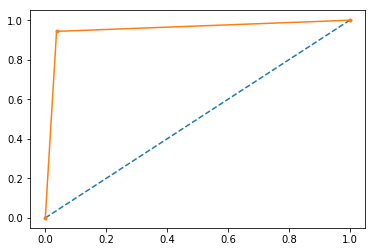

In [0]:
model_report(y_test, y_pred)

In [0]:
lr_param={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],}# l1 lasso l2 ridge
param_comb = 100

In [0]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(lr, param_distributions=lr_param, n_iter=param_comb, scoring='accuracy', n_jobs= -1, verbose=3, random_state=10 )

In [45]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 14 is smaller than n_iter=100. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=10, refit=True,
                   

In [46]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([0.00408912, 0.00359631, 0.00295742, 0.00515898, 0.00387088,
       0.00867979, 0.0070765 , 0.00868861, 0.0152754 , 0.00951934,
       0.01699964, 0.01067758, 0.01961398, 0.0120279 ]), 'std_fit_time': array([0.00176644, 0.00111959, 0.00044601, 0.00045911, 0.00058055,
       0.00329515, 0.00118291, 0.00018088, 0.00074398, 0.00080153,
       0.00323186, 0.00119944, 0.00226256, 0.00066963]), 'mean_score_time': array([0.00046762, 0.0004015 , 0.00058516, 0.00049297, 0.00052524,
       0.00055218, 0.00057737, 0.00053517, 0.0004437 , 0.0003709 ,
       0.00045848, 0.00046341, 0.00049297, 0.0003926 ]), 'std_score_time': array([9.69130386e-05, 7.67399250e-05, 5.53844301e-05, 5.00509950e-05,
       7.04041627e-06, 1.84503736e-05, 4.50829016e-05, 1.13114199e-05,
       2.72096781e-05, 3.78143859e-06, 2.09021175e-05, 7.83233962e-05,
       2.84144093e-05, 1.68208583e-05]), 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10-Fold Cross  Validation Score of Random Forest 0.932663618398109
Time Elapsed: 0.01273965835571289
Confusion Matrix =  [[100   8]
 [  5  84]]
Accuracy =  0.934010152284264
Precision =  0.9130434782608695
Recall =  0.9438202247191011
F1 Score =  0.9281767955801105
AUC Score = 0.9348730753225135
Kappa score =  0.8671749390591774
Error rate =  0.06598984771573602
AUC-ROC Curve: 


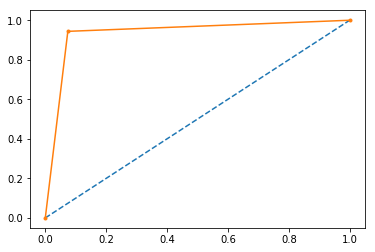

In [49]:
start_time = time.time()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l1', C = 0.1)
lr.fit(X_train, y_train)
end_time = time.time()
eta = end_time - start_time
#10-fold cross validation score
accuracy = cross_val_score(estimator = lr, X = X_train, y = y_train, cv =2)
lr_cross = accuracy.mean()
print("10-Fold Cross  Validation Score of Random Forest", lr_cross)
print('Time Elapsed:', eta)
#printing the output using the model report function
model_report(y_test, y_pred)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
max_features = ['auto', 'sqrt']
n_estimators = range(200, 2000, 10)
max_depth = range(10, 110, 10)
min_samples_split = range(2, 10, 1)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
param_comb = 100

In [54]:
random_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 37.3min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=30,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=340,
                                                    n_jobs=None,
 

In [55]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([5.5525105 , 8.09972241, 8.90147464, 1.64569058, 8.69899082,
       5.9168766 , 5.61150036, 8.59202628, 7.20784292, 1.67697437,
       3.17211795, 7.76341867, 0.70161822, 2.22588725, 3.17070837,
       1.31829989, 2.19585302, 5.27440991, 4.70369964, 3.4914669 ,
       2.36341448, 5.54667377, 5.39164891, 6.09563656, 7.1483731 ,
       2.461623  , 7.23238924, 5.63299713, 2.04436193, 2.078337  ,
       1.5232425 , 1.46180854, 1.97736697, 2.35172694, 8.59125729,
       1.20834365, 4.29230261, 0.86659758, 1.37303641, 2.32314646,
       5.98586414, 2.35507424, 5.23360307, 3.9481775 , 1.46268332,
       1.49129901, 2.60036922, 5.6526823 , 8.32303798, 3.88117285,
       2.74635403, 5.8696665 , 5.93304694, 7.83407984, 5.07793744,
       2.41965308, 8.88376734, 7.94607141, 5.70801921, 3.9438942 ,
       1.20078371, 4.34734328, 3.10223546, 5.61270418, 5.55075135,
       5.88988967, 6.12144725, 3.4237246 , 1.04221375, 3.11014252,
       6.67318387, 4.38057597

10-Fold Cross  Validation Score of Random Forest 0.9352576273937034
Time Elapsed: 2.984208583831787
Confusion Matrix =  [[101   7]
 [  5  84]]
Accuracy =  0.9390862944162437
Precision =  0.9230769230769231
Recall =  0.9438202247191011
F1 Score =  0.9333333333333335
AUC Score = 0.9395027049521432
Kappa score =  0.8772713113903021
Error rate =  0.060913705583756306
AUC-ROC Curve: 


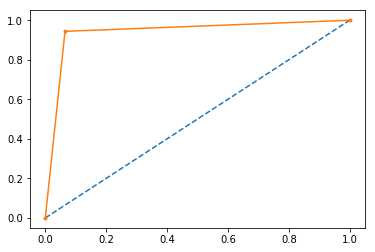

In [58]:
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1200, min_samples_split = 9, min_samples_leaf = 1, max_features = 'auto', max_depth = 50, bootstrap = True)
rf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = rf.predict(X_test)
end_time = time.time()
eta = end_time - start_time
#10-fold cross validation score
accuracy = cross_val_score(estimator = rf, X = X_train, y = y_train, cv =10)
rf_cross = accuracy.mean()
print("10-Fold Cross  Validation Score of Random Forest", rf_cross)
print('Time Elapsed:', eta)
#printing the output using the model report function
model_report(y_test, y_pred)

In [0]:
svc_params = {'C': range(10, 1000, 10), 'gamma': np.arange(0.1, 10, 0.1), 'kernel': ['rbf', 'poly', 'linear']}

In [63]:
random_search = RandomizedSearchCV(estimator = svc, param_distributions = svc_params, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 711 tasks      | elapsed: 21.5min


KeyboardInterrupt: ignored